## Input parameters of the vehicle
$
Kerb \: Weight = 108 \: kg \\
Passenger \: Mass = 80 \: kg \\
Vehicle \; accelerates \: 0-40 \: \frac{km}{hr} \: in \: 3.3 sec \\
Vehicle \: Velocity, v_{accel} = 40 \times  \frac{5}{18}  m/s\\
Vechicle \: Acceleation \: Time,t_{accel} = 3.3 s \\
Gradeability = 1 ^\circ \\
Rotational \: Inertia \: Factor, I_{rot} = 1.04 \\
$

Note: In this document first the Motor and battery rating is obtained according to the input parameters of the 2W vehicle and then in later stage the required motor rating to obtain the acceleration of 0-40 km/hr in 3.3 sec will be obtained

In [273]:
# importing the various python packages
import scipy as sp
import numpy as np
import math
import array
import matplotlib.pyplot as plt
from fractions import *
from array import *
import pandas as pd
import xlrd

#  Importing the excel file of Indian Driving Cycle(IDC)
IDC = pd.read_excel (r'D:\OneDrive - IIT Delhi\Jupyter\IDC_2W.xlsx', sheet_name='IDC')
t = pd.DataFrame(IDC, columns= ['Time(Sec)'])          # Time (Sec)
v = (5/18)*pd.DataFrame(IDC, columns= ['Speed(Kmph)'])        # Velocity (in m/s)
a = pd.DataFrame(IDC, columns= ['Accel(m/s^2)'])        # Acceleration (in m/s^2)

# Input parameters of the 2 Wheeler Electric Vehicle
m_kerb = 108;       # Kerb weight (Weight of vehicle in kg)
m_passenger = 80;   # Mass of the passenger (in kg)
v_accel = 40*5/18;  # Vehicle accelerates 0-40 km/hr in 3.3 sec (in m/s)
t_accel = 3.3;      # Vehicle acceleration time (in s) to reach 40 km/hr
gradeability = 1;   # Vehicle gradeability in degrees
I_rot = 1.04;       # Rotational inertia factor

## Tyre Size (90/90-12 tubeless for Ather 450x)
Note: Size of front wheel and rear wheel is same

In [274]:
# Calculation of radius of the tyre of the vehicle
wheel_dia = 12*2.54*10;         # Wheel diameter in mm
nominal_section_width = 90;     # Nominal section width of the tyre in mm
tyre_aspect_ratio = 0.9;        # Height of the tyre sidewall as percentage of the nominal section width
d_tyre = wheel_dia + 2*nominal_section_width*tyre_aspect_ratio; # diameter of the tyre (in mm)
r_tyre = d_tyre*0.5/1000;       # Radius of the tyre (in m)
print('Radius of the tyre, r_tyre = ',r_tyre, 'm')

Radius of the tyre, r_tyre =  0.2334 m


# Tractive Effort
## Calculation of Rolling Resistance Force
$
Coefficient \: of \: Rolling \: Resistance, \mu_{rr} = 0.005 \\
g=9.81 m/s^2 \\
Total\:Weight = Kerb\:Weight + Passenger\:Weight \\
Upward \: Slope \: Angle, \psi = Gradeability \times \frac{\pi}{180} \: rad \\
Rolling\:Resistance = \mu_{rr} \times Total\:Weight \times g \times \cos(\psi) \\
$

In [275]:
mu_rr = 0.005;                          # mu_rr = coefficient of rolling resistance
g = 9.81;                               # acceleration of gravity (in m/s^2)
m = m_kerb + m_passenger;               # Total mass of vehicle and passanger (in kg)
psi = gradeability*math.pi/180;         # Upward slope angle (in rad)
Frr = mu_rr*m*g*np.cos(psi);            # Rolling resistance force (in N)
print('Rolling Resistance Force, Frr = ', round(Frr, 3),'N')

Rolling Resistance Force, Frr =  9.22 N


## Calculation of Aerodynamic Drag
$ Air \: Density, \rho = 1.25 \: kg/m^3 \\
Frontal \: Area, A = 0.6 \: m^2 \\
Drag \: Coefficient \: Constant, C_d = 0.7 \\
Wind \: Velocity \: Component, v_{wind} = 0\: m/s\\
Aerodynamic \: Drag, F_{ad} = \rho \times A \times C_d \times (V_{wind} + V_{accel})^2 $

In [276]:
ro = 1.25;          # density of the air (in kg/m^3)
A = 0.6;            # frontal area (in m^2)
Cd = 0.7;           # drag coefficient constant
v_wind = 0;         # Wind velocity component (in m/s)
Fad = 0.5*ro*A*Cd*np.square(v_wind + v)  # Aerodynamic drag (in N)
#print('Aerodynamic Drag, Fad (in N)',round(Fad,3));

## Calculation of Hill Climbing Force
$ Upward \: Slope \: Angle, \psi = Gradeability \times \frac{\pi}{180} \: rad \\
Hill \: Climbing, F_{hc} = m \times g \times sin(\psi)  $

In [277]:
Fhc = m*g*math.sin(psi);                    # Hill Climbing (in N)
print('Hill CLimbing Force, Fhc = ',round(Fhc,3), 'N')

Hill CLimbing Force, Fhc =  32.187 N


## Calculation of Acceleration Force

$ Linear \: Acceleration, a_{linear} = \frac {Vehicle \: Velocity} {Vehicle \: Acceleration \: Time} \\ 
Force \: due \: to \: Linear \: Acceleration, F_{la} = m \times a_{linear} \\
$

In [278]:
Fla = m*I_rot*a;            # Force due to linear acceleration (N)
#print ('Force due to Linear Acceleration (in N), Fla = ', round(Fla,2));


## Calculation of Total Tractive Effort             
$
Total \: Tractive \: Effort = Rolling \: Resistance \: Force + Aerodynamic \: Drag + Hill \: Climbing \:Force + Force \: due \: to \: Linear \: Acceleration \\ \\
F_{te} = F_{rr} + F_{ad} + F_{hc} + F_{la}
$

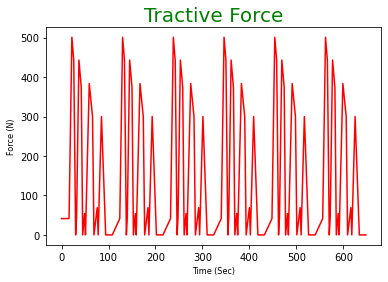

In [279]:
Fte1 = np.array(Frr + Fhc + np.add(Fad, np.asarray(Fla)));

#print(Fte1)
Fte = []
i=0;
for i in range(len(Fte1)):
    if Fte1[i] <= 0:
        Fte.append(-Fte1[i]*0);
    else:
        Fte.append(Fte1[i])

#for i in range(len(Fte)):
    # print(Fte[i])
    
#print(Fte)
%matplotlib inline
#plt.figure(1)
plt.plot(t, Fte, 'r');
plt.xlabel("Time (Sec)", fontsize=8);
plt.ylabel("Force (N)", fontsize=8);
#plt.xlim([0,len(t)]);
#plt.ylim([-Irated*math.sqrt(2),Irated*math.sqrt(2)]);
plt.title(label="Tractive Force", fontsize=20, color="green");

### Total Tractive Torque
$
T_{te} = F_{te}\times r_{tyre}
$

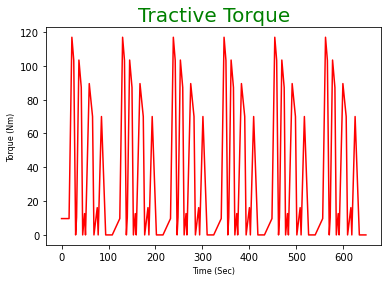

In [280]:
Tte = []
i = 0;
for i in range(len(Fte)):
    Tte.append(Fte[i]*r_tyre);

#for i in range(len(Tte)):
#     print(Tte[i])
    
#print(Tte)
plt.plot(t, Tte, 'r');
plt.xlabel("Time (Sec)", fontsize=8);
plt.ylabel("Torque (Nm)", fontsize=8);
#plt.xlim([0,len(t)]);
#plt.ylim([-Irated*math.sqrt(2),Irated*math.sqrt(2)]);
plt.title(label="Tractive Torque", fontsize=20, color="green");

### Tractive Power
$
P_{te} = F_{te} \times v
$

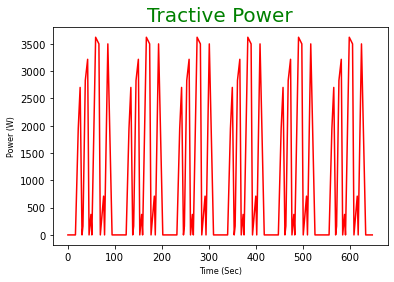

In [281]:
v1 =np.array(v);
#print(v1)
Pte = []
i = 0;
for i in range(len(Fte)):
    #print(i)
    Pte.append((Fte[i])*(v1[i]));

#print(len(Pte));

#for i in range(len(Fte)):
#     print(Pte[i])

plt.plot(t, Pte, 'r');
plt.xlabel("Time (Sec)", fontsize=8);
plt.ylabel("Power (W)", fontsize=8);
#plt.xlim([0,len(t)]);
#plt.ylim([-Irated*math.sqrt(2),Irated*math.sqrt(2)]);
plt.title(label="Tractive Power", fontsize=20, color="green");

### Total Energy Required
$
Energy = \frac{(P_{te}[i] + P_{te}[i-1]) \times (t[i]-t[i-1]) }{2}
$

In [282]:
t1 =np.array(t);
#print(len(t1))

Energy = []

for i in range(len(t1)):
    if i == 0:
        Energy.append(i)
        #print('IF = ',i)
    else:
        Energy.append(((Pte[i]+Pte[i-1])*(t1[i] - t1[i-1]))/2)
        #print('ELSE = ',i)
    
#print(len(Energy))
#for i in range(len(Energy)):
#     print(Energy[i])



### Total Distance
$
Distance = \frac{(v[i] + v[i-1]) \times (t[i]-t[i-1]) }{2}
$

In [283]:
Distance = []

for i in range(len(t1)):
    if i == 0:
        Distance.append(i);
    else:
        Distance.append(((v1[i]+v1[i-1])*(t1[i] - t1[i-1]))/(2*1000));         # Distance (in km)    

#print(len(Distance))
#for i in range(len(Distance)):
#     print(Distance[i]);

Distance1 = sum(Distance);                      # Total distance (km)
print('Total Distance = ',Distance1,'km');

Total Distance =  [3.9475] km


### Rating of the motor obtained from above calculation

In [284]:
Pte1 = max(Pte)/1000;                           # Peak Power throughout the drive cycle
print('Peak Power = ',Pte1,'kW')
Energy1 = sum(Energy)/(1000*3600);              # Battery (kWh)
print('Total Energy = ',Energy1,'kWh');
Energy2 =(150/Distance1)*Energy1;               # Required battery rating
print('Required battery rating = ',Energy2,'kWh')

Peak Power =  [3.62212456] kW
Total Energy =  [0.20856745] kWh
Required battery rating =  [7.92529906] kWh


# Modelling the Vehicle Acceleration 
## Acceleration Performance Parameters
$
T_{peak} = F_{te} \times \frac {r_{tyre}}{G} \\
Peak \: Power \: at \: 25 \: Percent \: of \: Maximum \: Speed \\%
P_{peak} = T_{peak} \times \omega \times 0.25
$

In [285]:
#T_peak = Fte*r_tyre/G           # Peak Motor torque (Nm)
#P = T_peak*w*0.25;
#print(T_peak)
#print(P)